# Проверка мультиколлинеарности.

Мультиколлинеарность — это явление, при котором одна из входных переменных статистической модели  линейно зависит от других входных переменных, т.е. между ними наблюдается сильная корреляция. В этой ситуации оценки коэффициентов (параметров) модели могут случайно и значительно изменяться даже при небольших изменениях в исходных данных.

Существует несколько способов проверки мультиколлинеарности. Здесь мы рассмотрим способ, в котором для каждого предиктора определим на сколько хорошо он объясняется другими предикторами. Для этого используем показатель, известный как коэффициент инфляции дисперсии (VIF), который измеряет корреляцию и силу корреляции между независимыми переменными в регрессионной модели . 

### Интерпритация коефицента VIF 
Квадратный корень VIF показывает, во сколькоо раз больше стала стандартная ошибка данного коэфициента, по сравнению с ситуацией, если бы данный предиктор был бы абсолютно независим от других предикторов. <br>
Пример: <br>
Если при некотором предикторе VIF равен 5.27 это означает, что стандартная ошибка этого коефициента в 2.3 раза больше, по сравнению с ситуацией, когда этот предиктор был бы нескоррелирован с другими. 

#### Перед расчётом VIF проанализируем наши данные

In [14]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import numpy as np

# грузим датасет
url = 'https://gist.githubusercontent.com/christophsax/178d34245afdd6e187b1fff72dbe7448/raw/f5f4189f949f117bee4e82e4aa75c104ed20b4f4/swiss.csv'
exam = pd.read_csv(url)
exam.rename(columns={'Infant.Mortality': 'Mortality'}, inplace=True) 
# exam.drop(columns='Location', inplace=True)
exam.head()

# исследуем модель
predictors = " + ".join(list(
    set(exam.columns) - set(['Fertility', 'Location'])
    ))
# y, X = dmatrices('Fertility ~' + predictors, data, return_type='dataframe')

model = smf.ols('Fertility ~' + predictors, data=exam).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Thu, 23 May 2024   Prob (F-statistic):           5.59e-10
Time:                        14:40:19   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      66.9152     10.706      6.250      0.000      45.294      88.536
Mortality       1.0770      0.382      2.822      0.007       0.306       1.848
Education      -0.8709      0.183     -4.758      0.000      -1.241      -0.501
Examination    -0.2580      0.254     -1.016      0.315      -0.771       0.255
Agriculture    -0.1721      0.070     -2.448      0.019      -0.314      -0.030
Catholic        0.1041      0.035      2.953      0.005       0.033       0.175
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                         807.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


VIF1:
                     0          1          2            3            4  \
VIF Factor  104.924833   1.107542   2.774943      3.67542     2.284129   
features     Intercept  Mortality  Education  Examination  Agriculture   

                   5  
VIF Factor   1.93716  
features    Catholic  


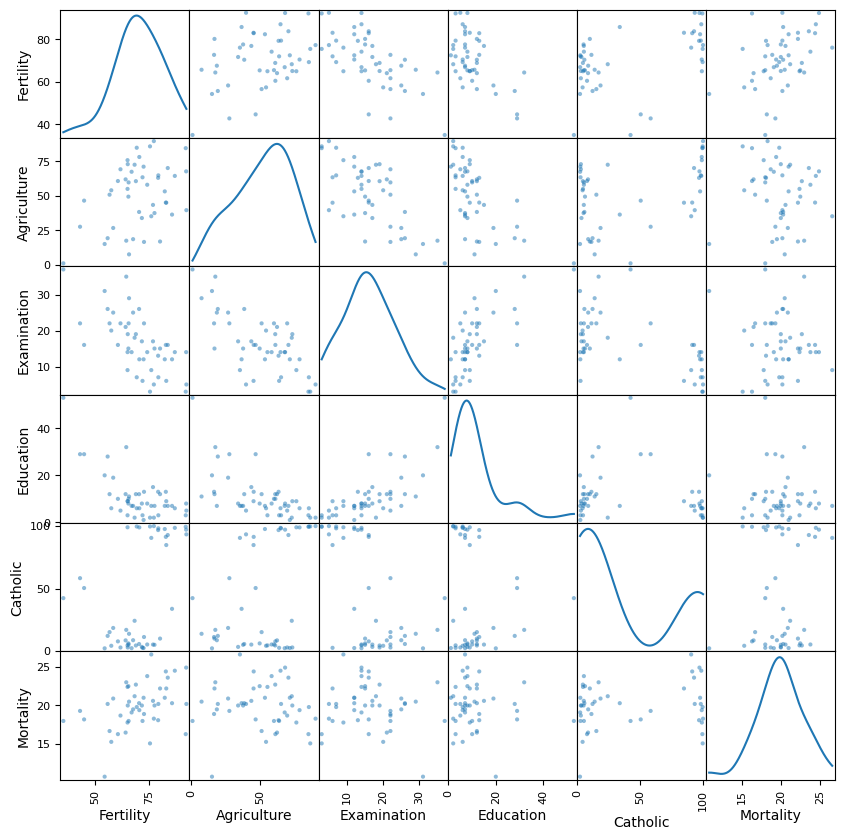

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor   
from patsy import dmatrices
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import scipy

url = 'https://gist.githubusercontent.com/christophsax/178d34245afdd6e187b1fff72dbe7448/raw/f5f4189f949f117bee4e82e4aa75c104ed20b4f4/swiss.csv'
data = pd.read_csv(url)
data.rename(columns={'Infant.Mortality': 'Mortality'}, inplace=True)     #для удобства
# data.head()

axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)

# рассчитываем VIF для каждого предиктора
predictors = " + ".join(list(
    set(data.columns) - set(['Fertility', 'Location'])
    ))
y, X = dmatrices('Fertility ~' + predictors, data, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(f'\nVIF1:\n{vif.T}')

# #самый большой показатель vif говорит о том, что переменную можно исключить, так как она хорошо объясняется другими предикторами. Проверим это 
# predictors = " + ".join(list(
#     set(data.columns) - set(['Fertility', 'Location', 'Examination'])
#     ))
# y, X = dmatrices('Fertility ~' + predictors, data, return_type='dataframe')


# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns
# print(f'\nVIF2:\n{vif.T}')
# # показатель Education снизился, но в остальном ничего сильно не изменилось. Посмотрим на коррелляцию
# print( f"Корреляция между Examination и зависимой переменной: {np.corrcoef(table['Fertility'], table['Education'])[0][1]}")


<a href="https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html">pandas.plotting.scatter_matrix</a> - рисует матрицу рассеивания графиков. <br>
<a href="https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html">plt.np.triu_indices_from </a>- создает индексы для верхнего треугольника матрицы.<br>
<a href="https://patsy.readthedocs.io/en/latest/API-reference.html#patsy.dmatrix">dmatrices</a> - формирование зависимой переменной и независимых переменных. <br>
Для каждой независимой переменной из X выполняется вычисление VIF, используя функцию <a href="https://clck.ru/3AnBbu">variance_inflation_facto</a> из библиотеки <a href="https://clck.ru/3AnBbu">statsmodels.stats.outliers_influence</a>.

Проверим насколько значима Education для зависимой переменной 

Корреляция между Examination и зависимой переменной: -0.6637888570350691


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     35.45
Date:                Thu, 23 May 2024   Prob (F-statistic):           3.66e-07
Time:                        15:43:40   Log-Likelihood:                -171.21
No. Observations:                  47   AIC:                             346.4
Df Residuals:                      45   BIC:                             350.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.6101      2.104     37.836      0.000      75.372      83.848
Education     -0.8624      0.145     -5.954      0.000      -1.154      -0.571
==============================================================================
Omnibus:                        4.586   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                2.612
Skew:                           0.351   Prob(JB):                        0.271
Kurtosis:                       2.083   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

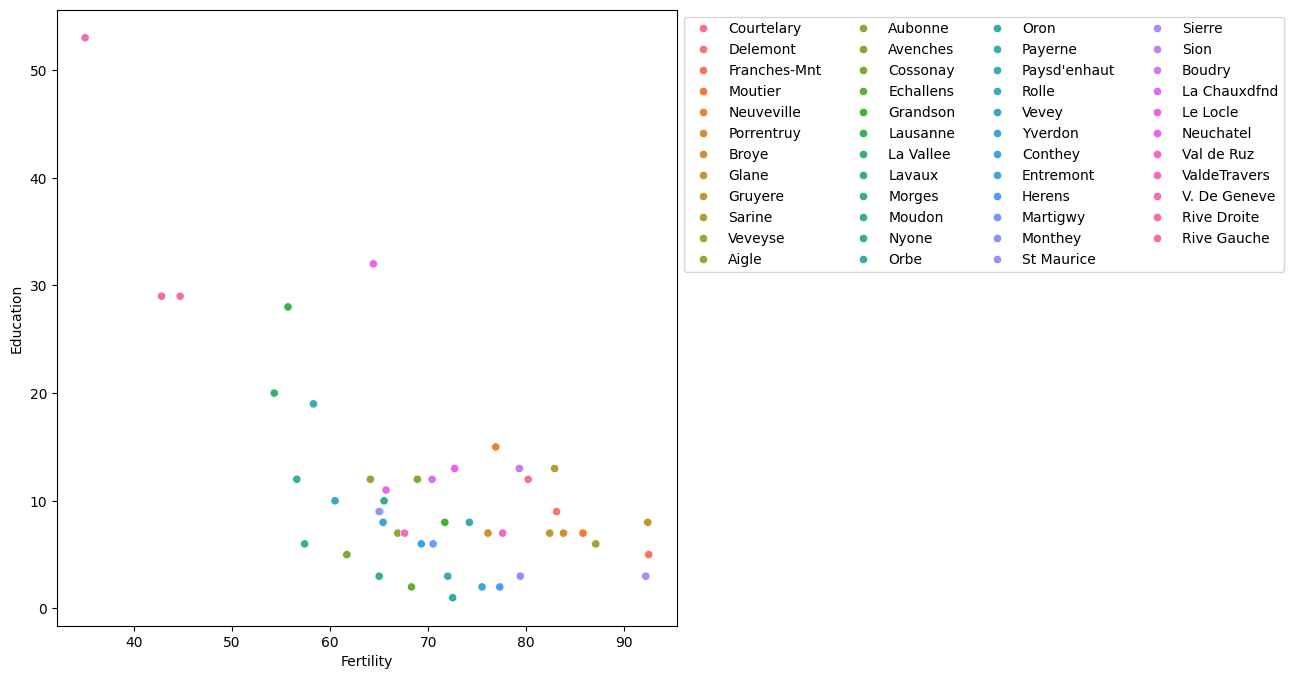

In [22]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import numpy as np

# грузим датасет
url = 'https://gist.githubusercontent.com/christophsax/178d34245afdd6e187b1fff72dbe7448/raw/f5f4189f949f117bee4e82e4aa75c104ed20b4f4/swiss.csv'
exam = pd.read_csv(url)
exam.rename(columns={'Infant.Mortality': 'Mortality'}, inplace=True) 
# exam.drop(columns='Location', inplace=True)
exam.head()

# рисуем диаграмму рассеяния
fig, ax = plt.subplots(figsize=(8,8))
g = sns.scatterplot(x='Fertility', y='Education', hue='Location', data=exam)

# немного надо трансформировать легенду
h,l = g.get_legend_handles_labels()
g.legend(h,l, ncol=4, bbox_to_anchor=(1, 1), loc=2)

print( f"Корреляция между Examination и зависимой переменной: {np.corrcoef(exam['Fertility'], exam['Education'])[0][1]}")

# исследуем модель
model = smf.ols('Fertility ~ Education', data=exam).fit()
display(model.summary())


Мы видим, что несмотря на то, что коррелляция отрицательна, она имеет очень большое значение